In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing the training set
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
import io
data_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

In [0]:
#numpy array of only one column
training_set = data_train.iloc[:,1:2].values


In [6]:
#feature scaling : Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_sc = sc.fit_transform(training_set)
train_sc



array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
#number of times step:
#creating a data structure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(train_sc[i-60:i,0])
  y_train.append(train_sc[i,0])
X_train,y_train = np.array(X_train) , np.array(y_train)  
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [8]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [0]:
#reshaping:adding more dimensionality.
#3D
X_train= np.reshape(X_train, (1198,60,1))


In [10]:
#Building the RNN
!pip install keras

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
#initialising the RNN:
regressor = Sequential()

In [0]:
#Adding the 1stt LSTM Layer and some Dropout regularization:
regressor.add(LSTM(units = 50 , return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the 2nd LSTM Layer and some Dropout regularization:
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the 3rd LSTM Layer and some Dropout regularization:
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the 4th LSTM Layer and some Dropout regularization:
regressor.add(LSTM(units = 50 , return_sequences = False))
regressor.add(Dropout(0.2))

In [0]:
#Adding the output layer:
regressor.add(Dense(units = 1))

In [0]:
#Compling the RNN:
regressor.compile(optimizer= 'adam', loss='mean_squared_error')

In [16]:
#Fitting the RNN to the training set:
regressor.fit(X_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0452
Epoch 2/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0050
Epoch 10/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [============================

In [17]:
#Making the predictions and visualsing the results:
#getting the real stock price for 2017
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [0]:
import io
dataset_test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))

In [0]:
#numpy array of only one column
testing_set = dataset_test.iloc[:,1:2].values


In [0]:
#getting the predicted stock price of 2017
dataset_total = pd.concat((data_train['Open'] , data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)




In [24]:
predicted_stock_price 

array([[770.71344],
       [768.1267 ],
       [767.73474],
       [768.8227 ],
       [771.90314],
       [777.36597],
       [782.86084],
       [785.72797],
       [786.3041 ],
       [785.7137 ],
       [784.9102 ],
       [784.2786 ],
       [783.9871 ],
       [784.4556 ],
       [785.4586 ],
       [789.36334],
       [795.63   ],
       [802.78345],
       [807.3745 ],
       [804.8866 ]], dtype=float32)

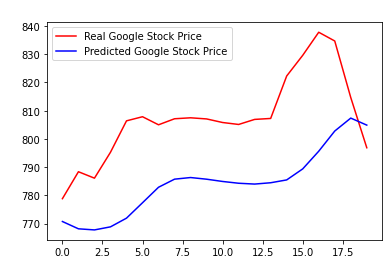

In [29]:
#visualising the results:
plt.plot(testing_set,color='red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price ,color='blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction',color = 'white')
plt.xlabel('Time',color = 'white')
plt.ylabel('Google Stock Price',color = 'white')
plt.legend()
plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(testing_set, predicted_stock_price))

In [33]:
rmse

25.781727334812462